# RLab02 - Gabriele Bertinelli (2103359)

In [ ]:
library(tidyverse)
library(gridExtra)
library(latex2exp)

set.seed(2103359)

#### 1) 
**1.1)**

In [2]:
# define the PDF. returns a vector of values
dpois.m <- function(x, lambda) {

	sapply(x, function(x) {
		if (x < 1) return(0)

		(lambda^x * exp(-lambda)) / (factorial(x) * (1-exp(-lambda)))
	})
}

# define the CDF. returns a vector of values
ppois.m <- function(x, lambda) {

	sapply(x, function(x) {
		if (x < 1) return(0)
		sum(sapply(1:x, function(i) dpois.m(i, lambda)))
	})
}

**1.2)**

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]

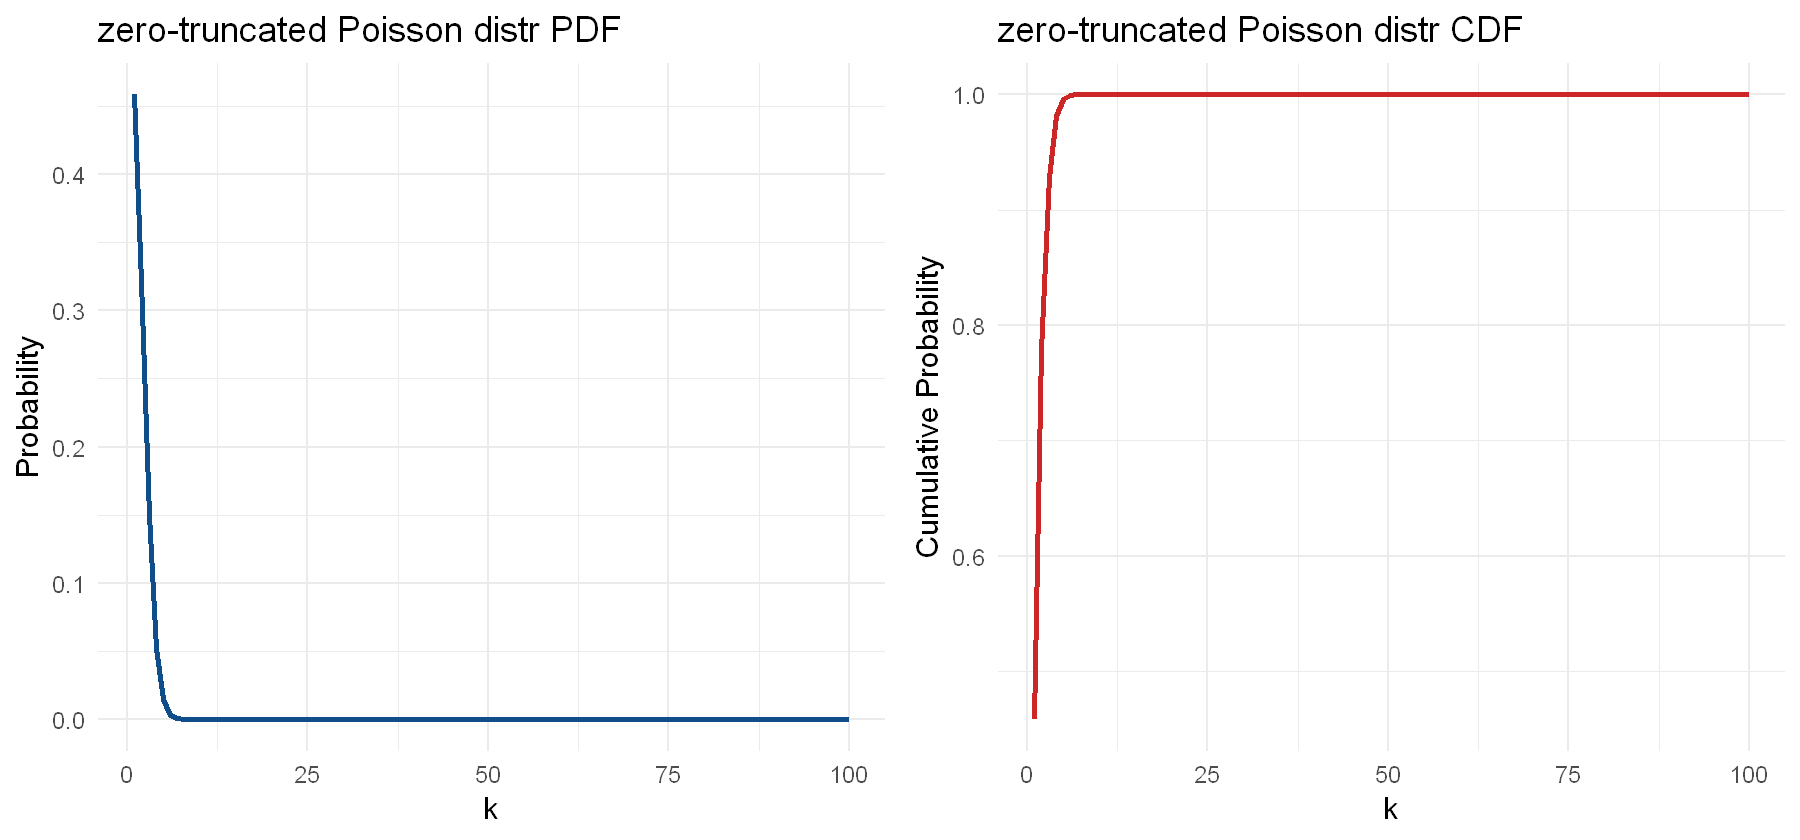

In [4]:
# Create the data frame
k_val <- 1:100
lambda <- 1.4

pdf <- dpois.m(k_val, lambda)
cdf <- ppois.m(k_val, lambda)

df <- data.frame(k = k_val, pdf = pdf, cdf = cdf)

options(repr.plot.width = 15, repr.plot.height = 7)

# Plot for PDF
pdf_plot <- ggplot(df, aes(x = k, y = pdf)) +
	# geom_bar(bins = length(df$k), fill = "lightblue", alpha = 1, stat = "identity", color='ivory') +
	geom_line(lwd=1.5, color='dodgerblue4') +
	labs(title = "zero-truncated Poisson distr PDF",
			 x = "k",
			 y = "Probability") +
	theme_minimal(base_size = 18)

# Plot for CDF
cdf_plot <- ggplot(df, aes(x = k, y = cdf)) +
	geom_line(lwd=1.5, color='firebrick3') +
	labs(title = "zero-truncated Poisson distr CDF",
			 x = "k",
			 y = "Cumulative Probability") +
	theme_minimal(base_size = 18)

# Arrange the plots side by side
combined_plot <- grid.arrange(pdf_plot, cdf_plot, ncol = 2)

# Display the combined plot
combined_plot


**1.3)**

In [5]:
mean_val <- sum(df$k * df$pdf) # mean value -> discrete func (if continuous, integrate)

variance1 <- sum((df$k - mean_val)^2 * df$pdf) # variance -> discrete func (if continuous, integrate)
variance2 <- sum(df$k^2 * df$pdf) - mean_val^2 

cat("Mean value: ", mean_val, "\n")
cat("Variance (method 1): ", variance1, "\n")
cat("Variance (method 2): ", variance2, "\n")

Mean value:  1.858235 
Variance (method 1):  1.006726 
Variance (method 2):  1.006726 


**1.4)**

In [6]:
# Define the inverse CDF
qpois.m <- function(p, lambda) {
	k <- 0
	while (ppois.m(k, lambda) < p) { # inverse cdf -> find the value of k for which cdf >= p
		k <- k + 1
	}
	return(k)
}

# Sample from the custom Poisson distribution using inverse sampling
rpois.m <- function(n, lambda) {
	u <- runif(n)
	samples <- sapply(u, function(p) qpois.m(p, lambda))
	return(samples)
}


Samples mean =  1.853

Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead."


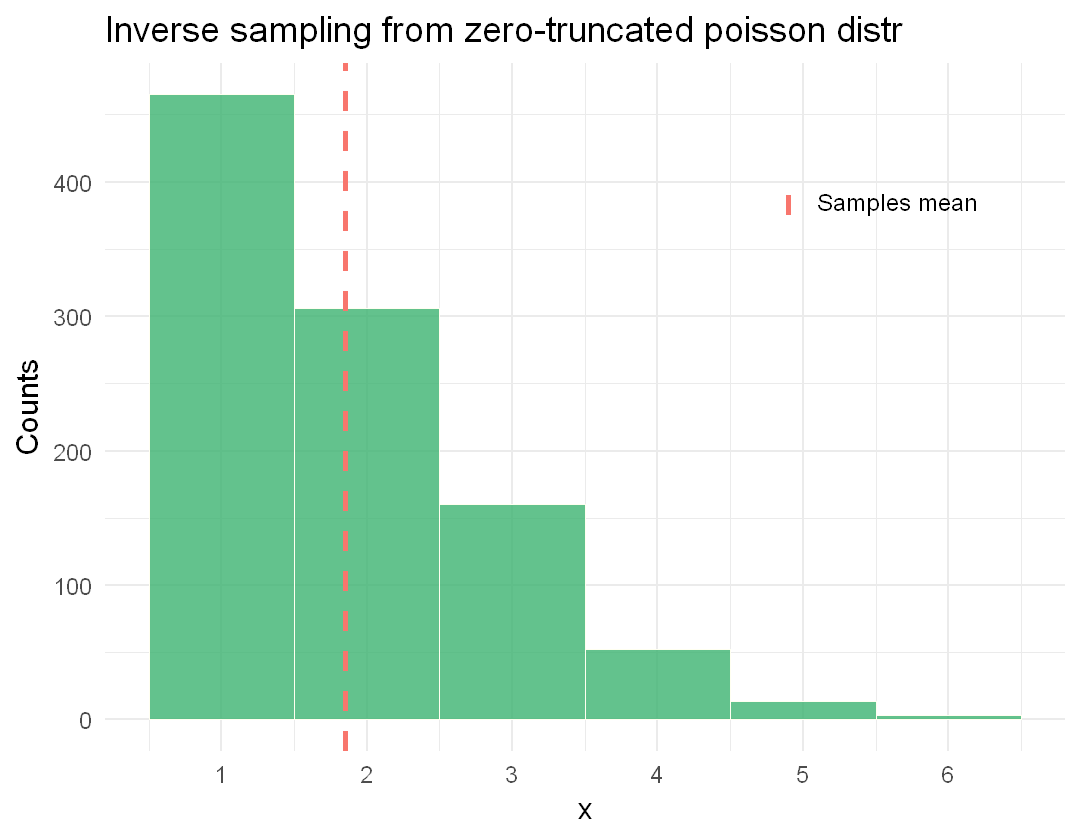

In [7]:
n_samples <- 1000

samples <- data.frame(x = rpois.m(n_samples, lambda))

samples_mean <- mean(samples$x)
cat('Samples mean = ', samples_mean)


options(repr.plot.width = 9, repr.plot.height = 7)
sample_hist <- ggplot(data=samples, aes(x=x)) +
	geom_histogram(binwidth=1, fill='mediumseagreen', color='ivory', alpha=0.8) +
	geom_vline(aes(xintercept = samples_mean, color = "Samples mean"), lwd=1.5, linetype = "dashed") +
	labs(title = "Inverse sampling from zero-truncated poisson distr",
			 x = "x", y = "Counts") +
	scale_x_continuous(breaks = seq(min(samples$x), max(samples$x), by = 1)) +
	theme_minimal(base_size = 18) +
	theme(legend.position = c(0.8, 0.8), legend.title = element_blank()) 

sample_hist

#### 2)
**2.1)**

In [8]:
dmuon_n <- function(E, E0 = 7.25, gamma = 2.7) {
    ifelse(E < E0, 1, (E - E0 + 1)^(-gamma))
}

integral_n <- integrate(dmuon_n, 0, Inf)$value

N <- 1 / integral_n

print(paste('Normalization factor N:', N))

[1] "Normalization factor N: 0.127579703198913"


**2.2)**

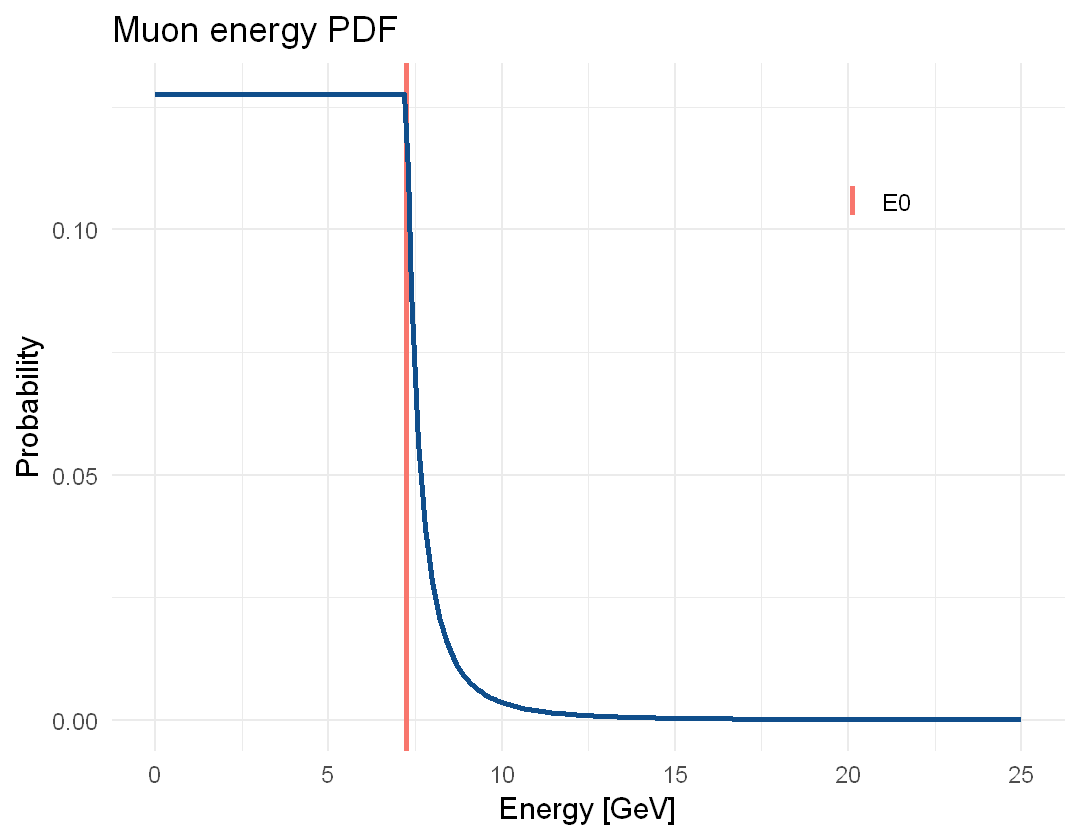

In [9]:
dmuon <- function(E, E0 = 7.25, gamma = 2.7) {
    ifelse(E < E0, N, N*(E - E0 + 1)^(-gamma))
}

e_val <- seq(0, 25, 0.1) # GeV

muon_pdf <- data.frame(en = e_val, prob = dmuon(e_val))

options(repr.plot.width = 9, repr.plot.height = 7)

pdf_plot <- ggplot(data=muon_pdf, aes(x=en, y=prob)) + 
	geom_vline(aes(xintercept = 7.25, color='E0'), lwd=1.5, linetype = "solid") +
	geom_line(color='dodgerblue4', lwd=1.5) +
	labs(title = "Muon energy PDF",
			 x = "Energy [GeV]", y = "Probability") +
	theme_minimal(base_size = 18) + 
	theme(legend.title = element_blank(), legend.position = c(0.8, 0.8))

pdf_plot

**2.3)**

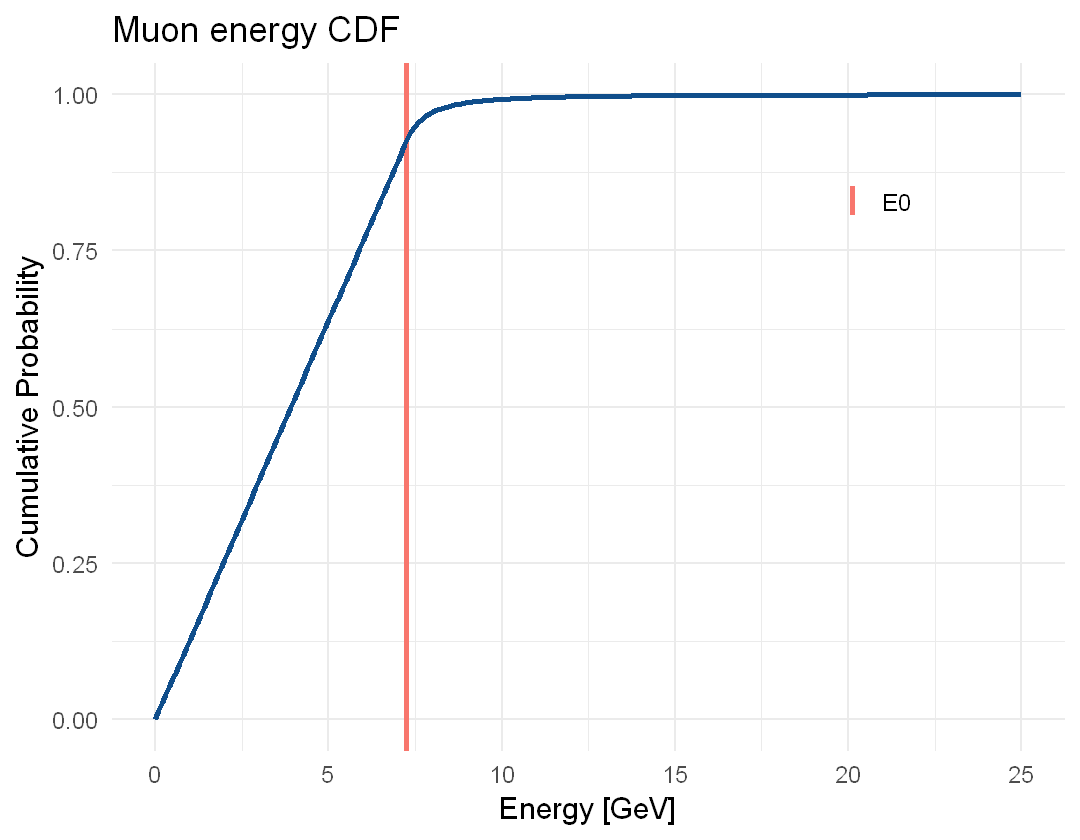

In [10]:
pmuon <- function(E, E0 = 7.25, gamma = 2.7) {

    sapply(E, function(E_val) integrate(dmuon, lower = 0, upper = E_val)$value)

}

muon_cdf <- data.frame(en = e_val, prob = pmuon(e_val))

options(repr.plot.width = 9, repr.plot.height = 7)

cdf_plot <- ggplot(data=muon_cdf, aes(x=en, y=prob)) + 
	geom_vline(aes(xintercept = 7.25, color='E0'), lwd=1.5, linetype = "solid") +
	geom_line(color='dodgerblue4', lwd=1.5) +
	labs(title = "Muon energy CDF",
			 x = "Energy [GeV]", y = "Cumulative Probability") +
	theme_minimal(base_size = 18) + 
	theme(legend.title = element_blank(), legend.position = c(0.8, 0.8))

cdf_plot

**2.4)**

In [11]:
mean_value <- integrate(function(E) E * dmuon(E), 0, Inf)$value

sprintf('Mean value = %.3f GeV', mean_value)

[1] "Mean value = 4.004 GeV"

**2.5)**

In [12]:
qmuon <- function(p, E0 = 7.25, gamma = 2.7) {
	E <- 0
	while (pmuon(E) < p) {
		E <- E + 0.1
	}
	return(E)
}

rmuon <- function(n, E0 = 7.25, gamma = 2.7) {
	u <- runif(n)
	samples <- sapply(u, function(p) qmuon(p))
	return(samples)
}

In [13]:
n_sampl <- 10000

samples <- data.frame(samples = rmuon(n_sampl))

Warning message:
"Removed 7 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."


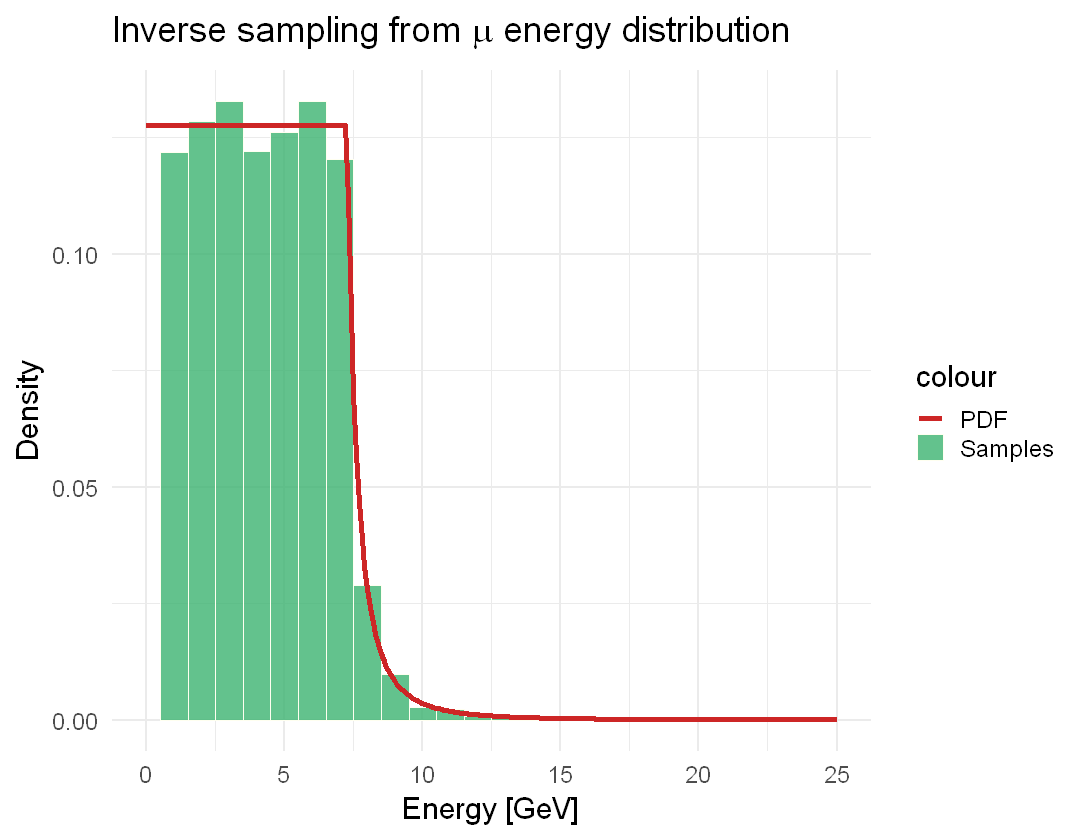

In [14]:
options(repr.plot.width = 9, repr.plot.height = 7)

samples_hist <- ggplot(data=samples, aes(x=samples)) +
	geom_histogram(aes(y=after_stat(density), color='Samples'), binwidth = 1, alpha=0.8, fill='mediumseagreen') +
	geom_line(data=muon_pdf, aes(x=en, y=prob, color='PDF'), lwd=1.5) +
	labs(title = TeX(r'(Inverse sampling from $\mu$ energy distribution)'),
			 x = "Energy [GeV]", y = "Density") +
	xlim(c(0,25)) +
	theme_minimal(base_size = 18) +
	scale_color_manual(values = c('PDF' = 'firebrick3', 'Samples' = 'ivory'))

samples_hist

#### 3)
**3.1)**

In [15]:
mu <- 2 # per day

k <- 5 

m_ineq <- mu/k

print(sprintf("Markov inequality -> prob that tmrw will occur >= 5 incidents is <= %.1f", m_ineq))

[1] "Markov inequality -> prob that tmrw will occur >= 5 incidents is <= 0.4"


**3.2)**

In [16]:
t <- 1 # day
pois.lambda <- mu*t # 2*day
k <- 5

pois <- 1 - ppois(k-1, pois.lambda) # at least k -> 1 - cdf(k-1)

print(sprintf('Poisson distr -> prob that tmrw will occur at least 5 incidents is %.2f', pois))

[1] "Poisson distr -> prob that tmrw will occur at least 5 incidents is 0.05"


**3.3)**

In [17]:
var <- 2
k <- 5
cheb <- var/(k^2)

print(sprintf('Chebyshev inequality -> prob that tmrw will occur >= 5 incidents is <= %.2f', cheb))

[1] "Chebyshev inequality -> prob that tmrw will occur >= 5 incidents is <= 0.08"


#### 4)  

**Chebychev inequality**  
I try to bound the number $X$ of waiting days using Chebychev inequality

In [18]:
# chebychev ineq

mean <- 7 # days
std <- 2 # days
lvl <- 0.95 # Helen wants to be 95% sure
quant <- (1+lvl)/2 # upper-tail 95% percentile

# P(|X - E(X)| < k) <= std^2/k^2 -> prob of waiting k days less that the mean
# my guess is that is H. wants to receive the book, she has to wait, with prob of 0.95, less
# than mu-k days -> lower bound 

k_min <- sqrt(std^2/(lvl))

# P(|X - E(X)| >= k) = 1-P(|X - E(x)| < k) <= std^2/k^2 -> prob of waiting k days more that the mean
# this is an upper bound 

k_max <- sqrt(std^2/(1-lvl))

max_w <- k_max + mean
min_w <- mean + k_min

cat('Chebychev inequality\n')

cat('\nWaiting more than', round(max_w, 0), 'days has a prob <= 0.05\nIt is very likely that H. will wait less than', round(max_w, 0), 'days \n')

cat('\nQaiting less than', round(min_w, 0), 'days has a prob <= 0.95\nIt is very likely that H. will wait more than', round(min_w, 0), 'days\n')

cat('\nTherefore, the number of waiting days will be', round(min_w, 0), '< X <', round(max_w, 0), 'days\n')

Chebychev inequality

Waiting more than 16 days has a prob <= 0.05
It is very likely that H. will wait less than 16 days 

Qaiting less than 9 days has a prob <= 0.95
It is very likely that H. will wait more than 9 days

Therefore, the number of waiting days will be 9 < X < 16 days


In [19]:
# I do the same calculation but using the upper-tale of the 95% percentile
k_min.u <- sqrt(std^2/(quant))

k_max.u <- sqrt(std^2/(1-quant))

max_w.u <- k_max.u + mean
min_w.u <- mean + k_min.u

cat('Chebychev inequality\n')

cat('\nWaiting more than', round(max_w.u, 0), 'days has a prob <= 0.05\nIt is very likely that H. will wait less than', round(max_w.u, 0), 'days \n')

cat('\nQaiting less than', round(min_w.u, 0), 'days has a prob <= 0.95\nIt is very likely that H. will wait more than', round(min_w.u, 0), 'days\n')

cat('\nTherefore, the number of waiting days will be', round(min_w.u, 0), '< X <', round(max_w.u, 0), 'days\n')

Chebychev inequality

Waiting more than 20 days has a prob <= 0.05
It is very likely that H. will wait less than 20 days 

Qaiting less than 9 days has a prob <= 0.95
It is very likely that H. will wait more than 9 days

Therefore, the number of waiting days will be 9 < X < 20 days


**First method**  
I suppose that the variable follows a Poisson variable and follows an Exponential distribution, so  
$E[x] = \lambda = var(x)$ with $\lambda=1/7$ (i.e. one book every 7 days).  
Therefore the probability of waiting a # of days ($X$) less or equal to the days in advance ($x$) is $P(X\le x) = CDF(x)$.  
So, $x_{waiting} = \min{x}\quad s.t.\quad P(X\le x) >= 0.95$ <!--(we use the $>$ because we cannot have a perfect equality since probabilities are continuous variables)-->  

This is a wrong assumption since the waiting time for a book is not a rare event (well, we hope waiting for a book is not so rare, otherwise it'll be an inefficiency) and we are not counting some events.  
So this is just a test.

To be sure at 95% should order the book, at least, 26 days in advance


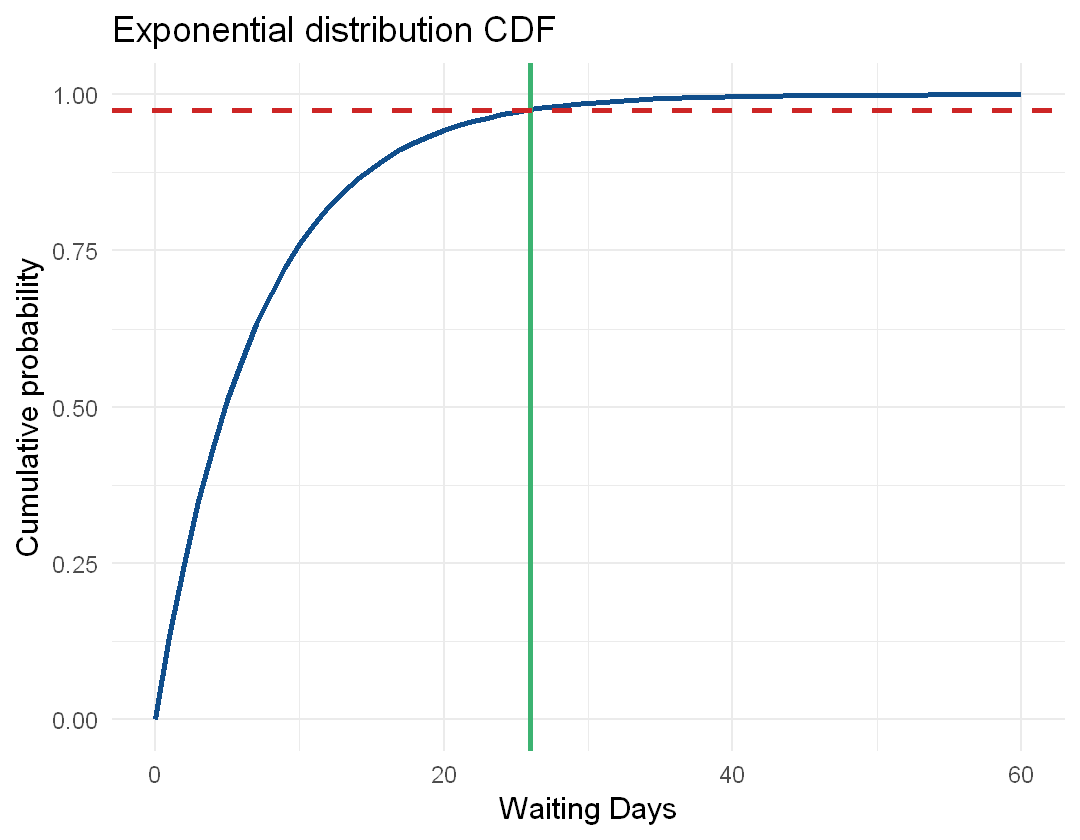

In [20]:
t <- 0:60

exp_cdf <- pexp(q=t, rate=1/mean)
exp_df <- data.frame(t=t, exp=exp_cdf)

w_days.pois <- min(exp_df$t[exp_df$exp >= quant])

cat('To be sure at 95% should order the book, at least,', round(w_days.pois, 2), 'days in advance\n')

options(repr.plot.width = 9, repr.plot.height = 7)

cdf_plot.pois <- ggplot(data=exp_df, aes(x=t, y=exp)) +
	geom_line(color='dodgerblue4', lwd=1.5) +
	geom_vline(xintercept = w_days.pois, color='mediumseagreen', lwd=1.5) +
	geom_hline(yintercept = quant, color='firebrick3', lwd=1.5, linetype='dashed') + # uppe-tail 95% percentile
	labs(title = "Exponential distribution CDF",
			 x = "Waiting Days", y = "Cumulative probability") +
	theme_minimal(base_size = 18)

cdf_plot.pois

**Second method**

This time I suppose that the variable follows the Erlang distribution (probably it's more a Gamma distribution since $\alpha$ (i.e. `shape`) is not an integer). It is often used to model the waiting times between Poisson-distributed events. This distribution seems more suitable, but again the waiting time for a book is not a rare event (or we hope so).  
The parameters used will be `shape` = $n = \frac{{E[x]}^2}{Var(x)} = \frac{7^2}{2^2}$ and `rate` = $\lambda = \frac{E[c]}{Var(x)} = \frac{7}{2^2}$

To be sure at 95% should order the book, at least, 12 days in advance


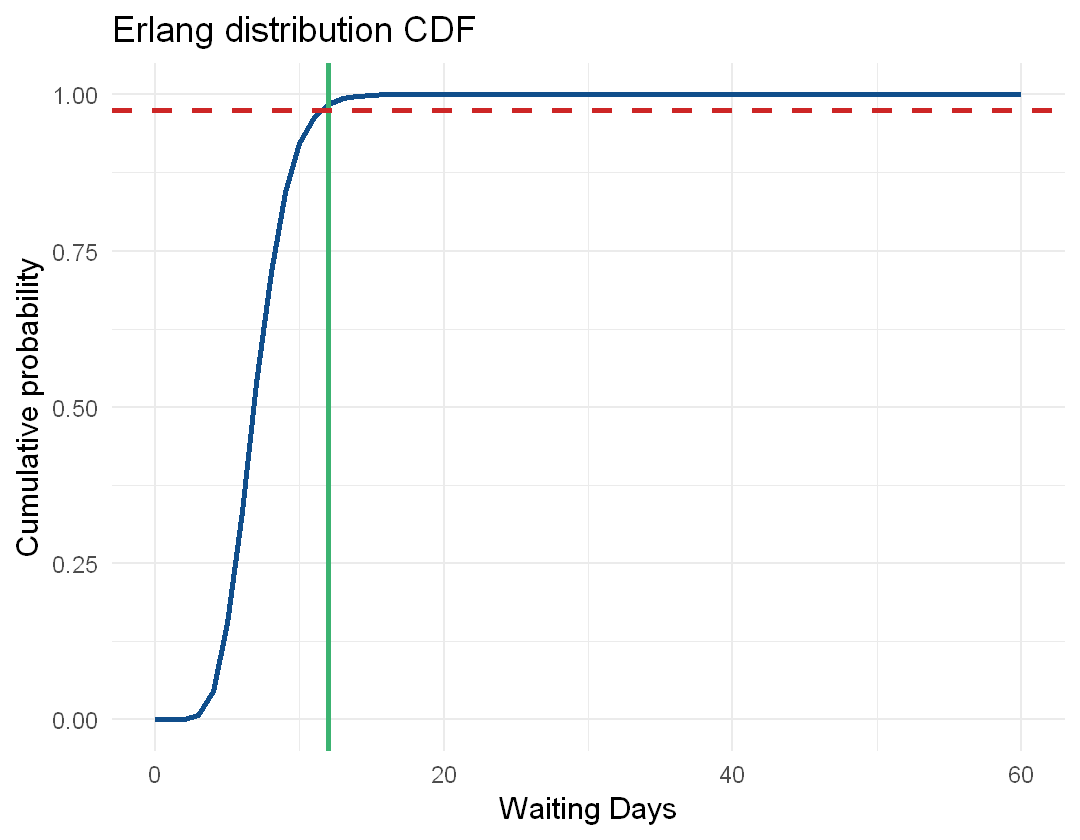

In [21]:
alpha <- mean^2 / std^2
lambda <- mean / std^2

t <- 0:60

erl_cdf <- pgamma(t, shape=alpha, scale=1/lambda)
erl_df <- data.frame(t=t, erl=erl_cdf)

w_days.erl <- min(erl_df$t[erl_df$erl >= quant])

cat('To be sure at 95% should order the book, at least,', round(w_days.erl, 2), 'days in advance\n')


options(repr.plot.width = 9, repr.plot.height = 7)

cdf_plot.erl <- ggplot(data=erl_df, aes(x=t, y=erl)) +
	geom_line(color='dodgerblue4', lwd=1.5) +
	geom_vline(xintercept = w_days.erl, color='mediumseagreen', lwd=1.5) +
	geom_hline(yintercept = quant, color='firebrick3', lwd=1.5, linetype='dashed') +
	labs(title = "Erlang distribution CDF",
			 x = "Waiting Days", y = "Cumulative probability") +
	theme_minimal(base_size = 18)

cdf_plot.erl

**Third method**  
This time I suppose that our variable is distributed as a Normal random variable with $E[x]$ and $\sigma(x)$ given.  
I consider the 95% probability as the 95%-percentile.  
I use `qnorm` which gives the value of the variable $x$ corresponding to the upper tail of the 95%-percentile.
Therefore $x$ is the minimum number of days before the desired date such that Helen can be 95% sure that she will receive the book by that date.

To be sure at 95% should order the book, at least, 11 days in advance


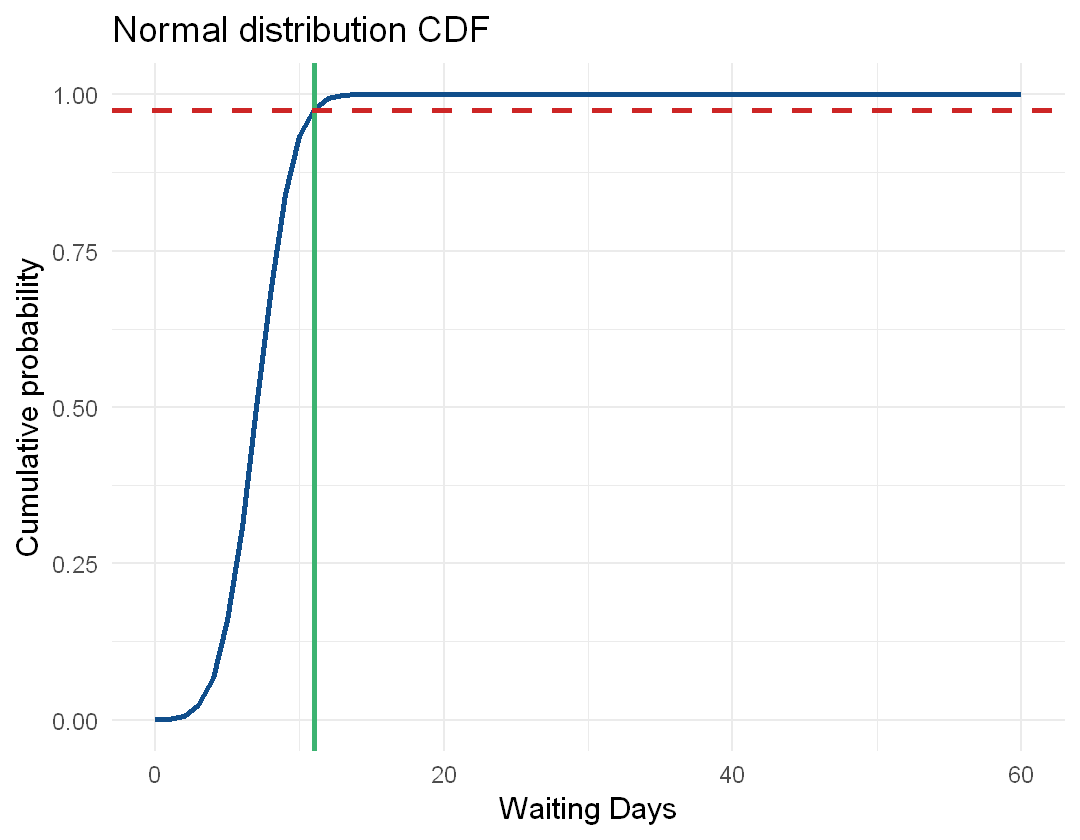

In [22]:
t <- 0:60

norm_cdf <- pnorm(t, mean=mean, sd=std)
norm_df <- data.frame(t=t, norm=norm_cdf)

w_days.norm <- min(norm_df$t[norm_df$norm >= quant])

cat('To be sure at 95% should order the book, at least,', round(w_days.norm, 2), 'days in advance\n')


options(repr.plot.width = 9, repr.plot.height = 7)

cdf_plot.norm <- ggplot(data=norm_df, aes(x=t, y=norm)) +
	geom_line(color='dodgerblue4', lwd=1.5) +
	geom_vline(xintercept = w_days.norm, color='mediumseagreen', lwd=1.5) +
	geom_hline(yintercept = quant, color='firebrick3', lwd=1.5, linetype='dashed') +
	labs(title = "Normal distribution CDF",
			 x = "Waiting Days", y = "Cumulative probability") +
	theme_minimal(base_size = 18)

cdf_plot.norm

I could have reached the same results using the quantile function of each distribution, calculating the upper-tail of the 95%-percentile

In [23]:
x.pois <- qexp(quant, rate=1/mean)

cat('Exponential distribution:', round(x.pois, 2), 'days in advance\n')

x.erl <- qgamma(quant, shape=alpha, scale=1/lambda)

cat('Erlang distribution:', round(x.erl, 2), 'days in advance\n')

x.norm <- qnorm(quant, mean = mean, sd = std)

cat('Normal distribution:', round(x.norm, 2), 'days in advance\n')

Exponential distribution: 25.82 days in advance
Erlang distribution: 11.43 days in advance
Normal distribution: 10.92 days in advance


Obviously, I should take an integer value since we are using "days" as a unit.  
Therefore: 
- Exponential -> 26 days
- Erlang -> 12 days
- Normal -> 11 days

**Results comparison**  
Here I compare the results I obtained before.  
Clearly, the Exponential distribution (blue line) is not suitable for this task.  
Normal and Erlang distribution returns similar values and they are inside the boundaries founded with the Chebychev inequality.  
So I can conclude that if Helen wants to receive a book by a given date with a 95% of probability, she should order the book ~11 days in advance.

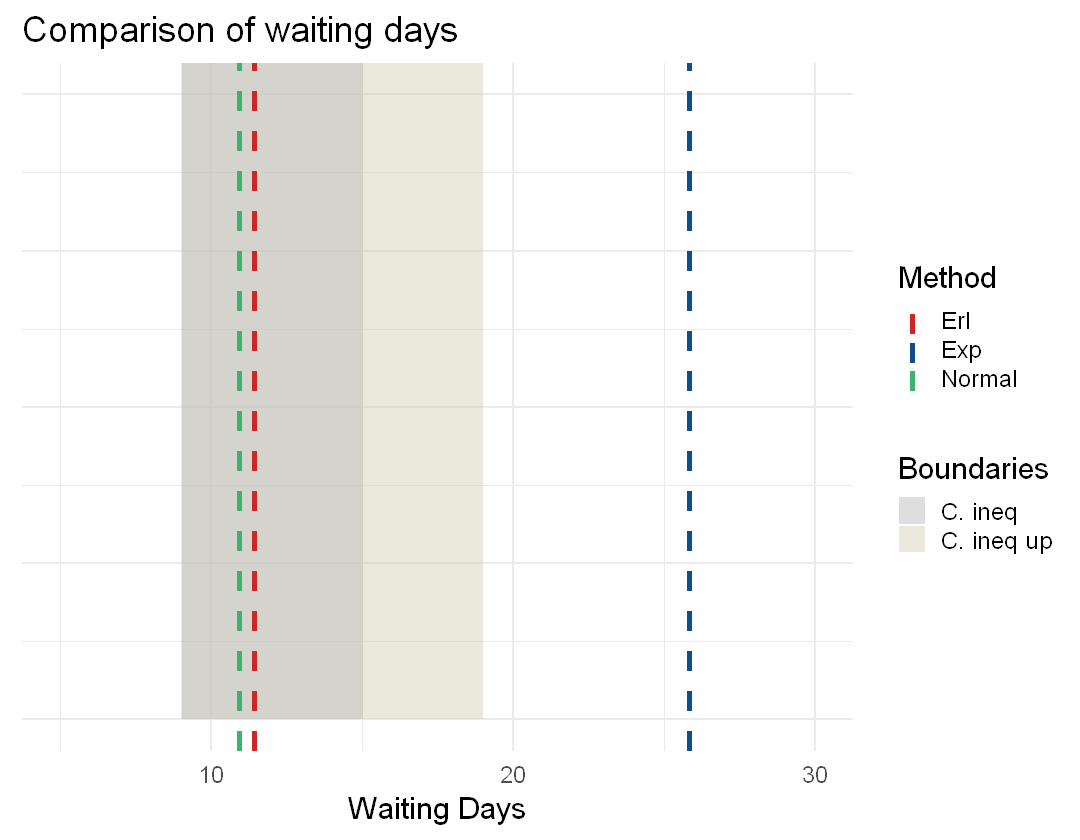

In [24]:
res_plot <- ggplot()+
	geom_ribbon(aes(x = min_w.u:max_w.u, ymin=0, ymax=Inf, fill='C. ineq up'), alpha=.4) +
	geom_ribbon(aes(x = min_w:max_w, ymin=0, ymax=Inf, fill='C. ineq'), alpha=.5) +
	geom_vline(aes(xintercept = x.pois, color='Exp'), lwd=1.5, linetype='dashed') +
	geom_vline(aes(xintercept = x.erl, color='Erl'), lwd=1.5, linetype='dashed') +
	geom_vline(aes(xintercept = x.norm, color='Normal'), lwd=1.5, linetype='dashed') +
	labs(title = "Comparison of waiting days",
			 x = "Waiting Days", color = 'Method', fill='Boundaries') +
	theme_minimal(base_size = 18) + 
	theme(axis.text.y = element_blank()) +
	scale_color_manual(values = c('Exp' = 'dodgerblue4', 'Erl' = 'firebrick3', 'Normal' = 'mediumseagreen', 'C. ineq' = 'ivory', 'C. ineq up' = 'ivory')) +
	scale_fill_manual(values = c('C. ineq' = 'grey', 'C. ineq up' = 'lemonchiffon3')) +
	xlim(c(5,30)) + ylim(c(0,10))

res_plot

#### 5)  

Since there are 26 pairs and we are interested in the probability of at most 10 pairs being black and red, we can model this as a binomial distribution with parameters `n = 26` (the number of trials, or pairs) and `p = 0.5` (the probability of success, or a pair being black and red, assuming a fair deck).  

We need the mean and the variance -> `mean = np`, `var = np(1-p)`  

C. ineq is $P(|X-\mu|\ge k) \le \frac{var(x)}{k^2}$, meaning $P(|X-13|\ge 3)<=\frac{13(1-0.5)}{3^2}$

In [25]:
n_pairs <- 26
prob <- 0.5
k <- 3

var <- n_pairs*prob*(1-prob)

cheb <- var/k^2 

cat('Chebyshev inequality -> prob that the number of pairs is at most 10 <= ', round(cheb, 2), '\n')

Chebyshev inequality -> prob that the number of pairs is at most 10 <=  0.72 


Assuming these are binomial random variables, we get:  

$P(X \leq 10) = \sum_{k=0}^{10} \binom{26}{k} (0.5)^k (0.5)^{26-k}$

In [26]:
at_most_10 <- pbinom(q=10, size=n_pairs, prob=prob)

cat('Binomial variables -> prob that the number of pairs is at most 10 ~', round(at_most_10, 2), '\n')

Binomial variables -> prob that the number of pairs is at most 10 ~ 0.16 


#### 6)  
**6.1)** Poisson distr -> number of event occurred at or prior time t

In [27]:
wtime <- 1/30 # secs

decay <- 2 # 2 every min

t_1 <- 2 # mins
t_2 <- 3 # mins

# P(N(2 min) >= 6) = 1 - sum_0^5[P(N(2 min) = k)]

prob_6 <- 1 - ppois(5, lambda = decay*t_1)

# P(N(3 min) < 4) = sum_0^4[P(N(3 min) = k)]

prob_4 <- ppois(4, lambda = decay*t_2)

cat('Probability of getting more than 6 passengers in the next 2 mins is: ', round(prob_6*100, 2), '%\n')
cat('Probability of getting less than 4 passengers in the next 3 mins is:', round(prob_4*100, 2), '%\n')

Probability of getting more than 6 passengers in the next 2 mins is:  21.49 %
Probability of getting less than 4 passengers in the next 3 mins is: 28.51 %


**6.2)** Gamma distr -> inter-arrival time of any two consecutive events

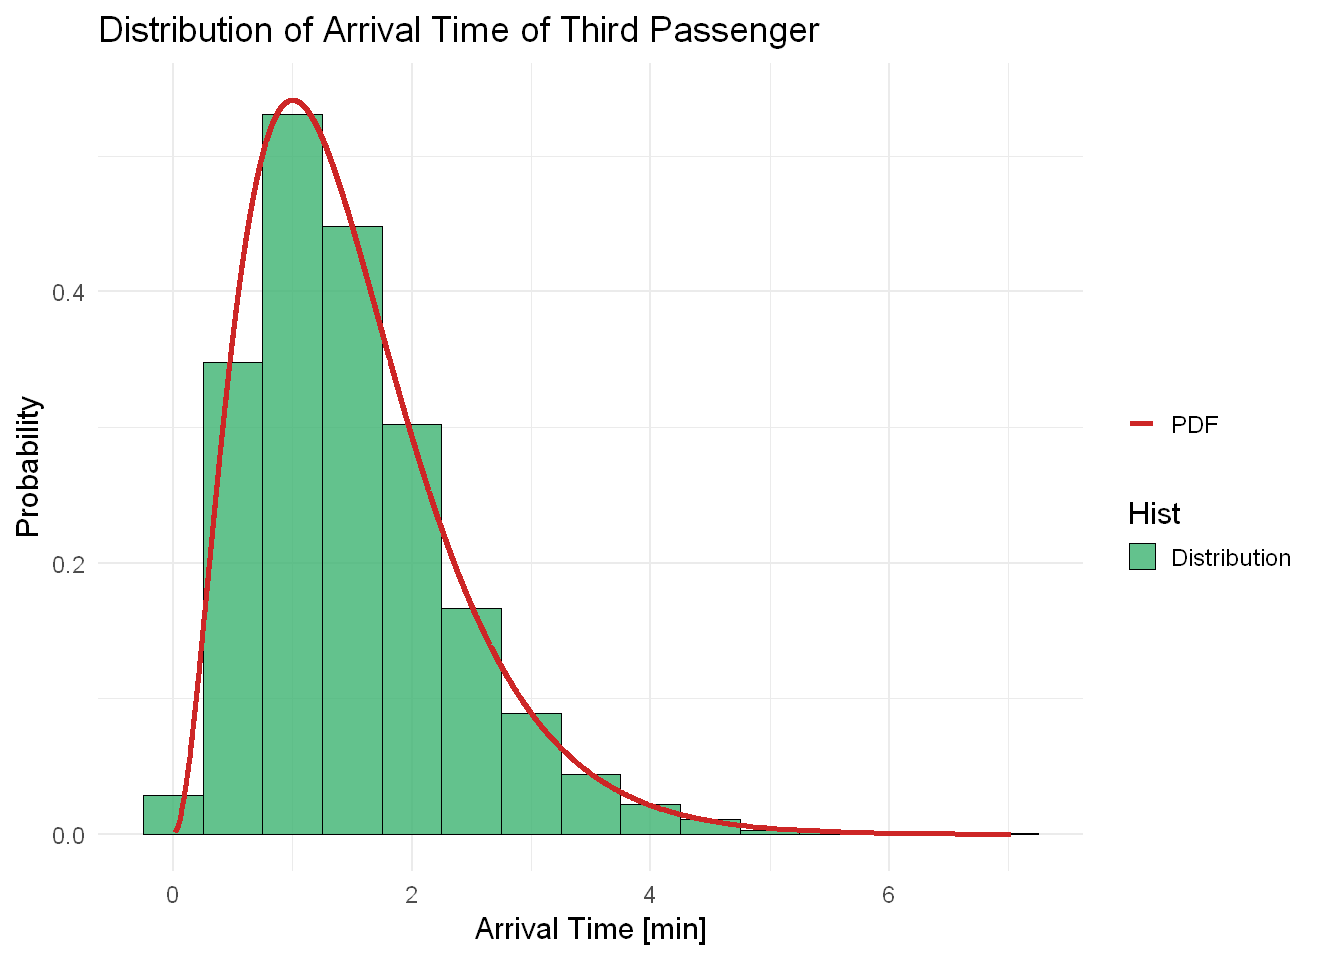

In [28]:
arrival_times <- rgamma(10000, shape=3, rate=2) # 3rd passenger, 2 passengers every min

times <- seq(0, 30, length.out=10000)
pdf_3 <- dgamma(arrival_times, shape=3, rate=2) 

df_bus <- data.frame(time = arrival_times, pdf = pdf_3)

options(repr.plot.width = 11, repr.plot.height = 8)

rd3_plot <- ggplot(df_bus, aes(x = time)) +
	geom_histogram(aes(y = after_stat(density), fill='Distribution'), binwidth = 0.5, color = "black", alpha=0.8) +
#   geom_density(color = "firebrick3", lwd=1) +
	geom_line(aes(y = pdf, color='PDF'), lwd=1.5) +
  	labs(x = "Arrival Time [min]",
    		y = "Probability",
    		title = "Distribution of Arrival Time of Third Passenger", color='', fill='Hist') +
	scale_color_manual(values = c('PDF' = 'firebrick3')) + 
	scale_fill_manual(values = c('Distribution' = 'mediumseagreen'))+
	theme_minimal(base_size=18)

rd3_plot

**6.3)**

Warning message:
"Removed 1986 rows containing missing values or values outside the scale range
(`geom_line()`)."


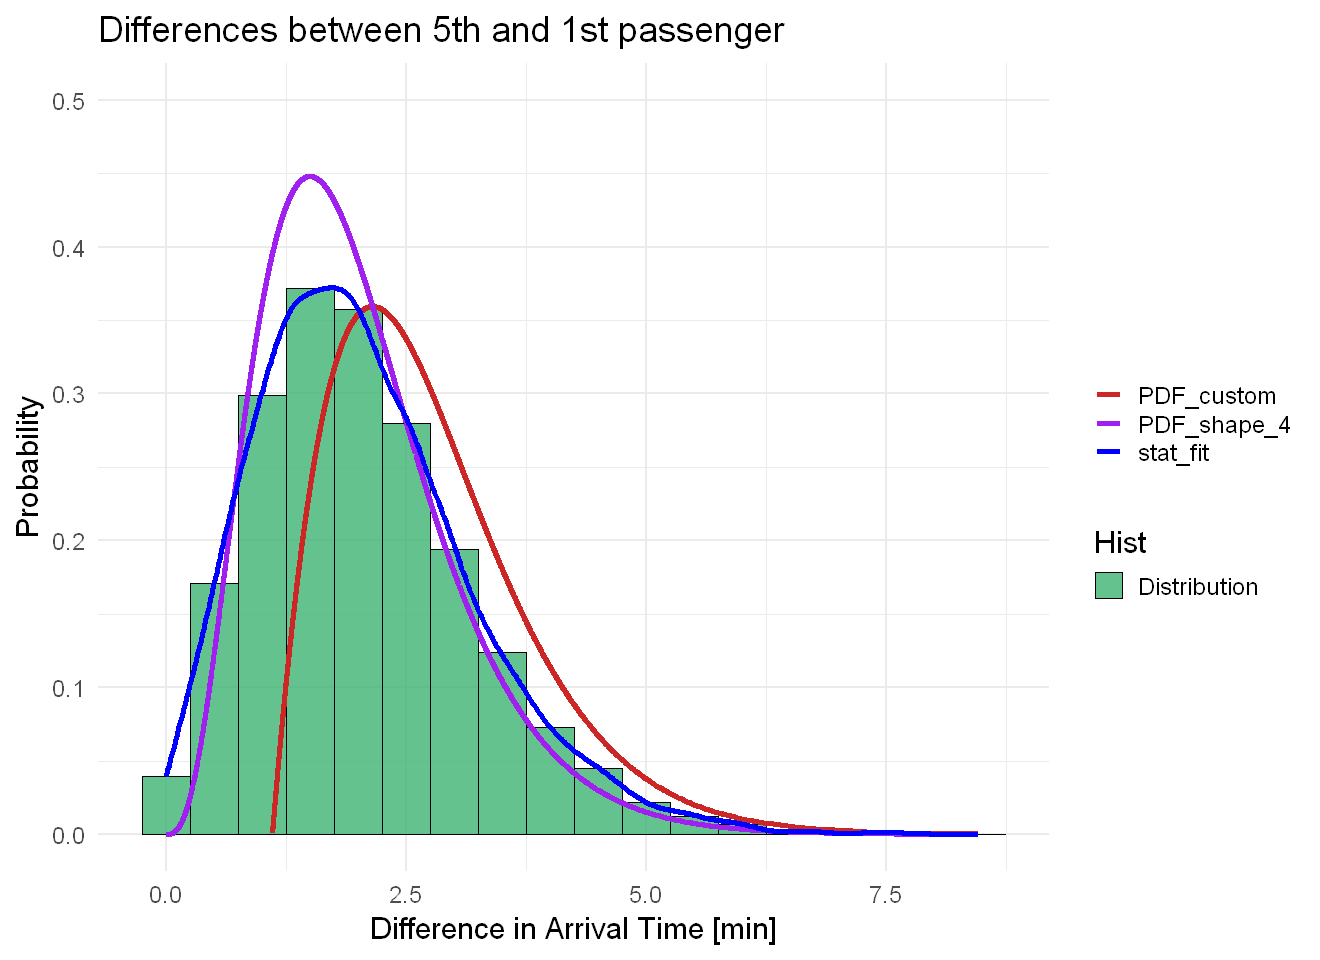

In [29]:
# Perform simulations
arrival_times_5 <- rgamma(10000, shape=5, rate=2)
arrival_times_1 <- rgamma(10000, shape=1, rate=2)

# select sample for which arr_1 < arr_5 (because the 5th passenger arrives after the 1st)
arrival_df <- data.frame(st1 = arrival_times_1, th5 = arrival_times_5) %>% dplyr::filter(st1 < th5) %>% mutate(diff = th5-st1)

pdf_4 <- dgamma(arrival_df$diff, shape=4, rate = 2)
# pdf_1 <- dgamma(arrival_df$diff, shape=1, rate = 2)

# custom pdf f(x) = Gamma(x,5,2) - Gamma(x,1,2) 
# I had to cut at y=0 because f(x) has also negative values, that are not possible
c.pdf <- function(x) {
	sapply(x, function(x){
		exp(-2*x)*((4*x^4-6)/3)
	})
}

pdf_c <- c.pdf(arrival_df$diff)

arrival_df <- arrival_df %>% mutate(pdf_4 = pdf_4, pdf_c = pdf_c)


options(repr.plot.width = 11, repr.plot.height = 8)

thst_plot <- ggplot(arrival_df, aes(x = diff)) +
	geom_histogram(aes(y = after_stat(density), fill='Distribution'), binwidth = 0.5, color = "black", alpha=0.8) +
#   geom_density(color = "firebrick3", lwd=1) +
	geom_line(aes(y = pdf_c, color='PDF_custom'), lwd=1.5) +
	geom_line(aes(y = pdf_4, color='PDF_shape_4'), lwd=1.5)+
	# geom_line(aes(y = pdf_diff, color='PDFdiff'), lwd=1.5)+
	stat_density(geom = "line", aes(color = 'stat_fit'), lwd=1.5) +
  	labs(x = "Difference in Arrival Time [min]",
    		y = "Probability",
    		title = "Differences between 5th and 1st passenger", color='', fill='Hist') +
	scale_color_manual(values = c('PDF_custom' = 'firebrick3', 'stat_fit' = 'blue', 'PDF_shape_4' = 'purple')) + 
	scale_fill_manual(values = c('Distribution' = 'mediumseagreen'))+
	theme_minimal(base_size=18)+
	ylim(c(0, 0.5))

thst_plot


In [30]:
mean <- mean(arrival_df$diff)
median <- median(arrival_df$diff)

# Function to calculate mode
getMode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

mode <- getMode(arrival_df$diff)

print(sprintf('Mean of the distribution is: %.2f', mean))
print(sprintf('Median of the distribution is: %.2f', median))
print(sprintf('Stat Mode of the distribution is: %.2f', mode))

[1] "Mean of the distribution is: 2.06"
[1] "Median of the distribution is: 1.91"
[1] "Stat Mode of the distribution is: 3.85"


The shape of the histogram is kind of expected. Given the distribution above, we expect the 1st passenger to arrive at 0.5 min, i.e. 30 sec, (mean value) and the 5th passenger at 2.5 min. Thus the expected mean difference in time arrival is 2 min, and this is what we got.  

I tried to calculate the pdf of the difference `c.pdf` (in red), but I got wrong results because Gamma(1, a) ~ Exp(a) and so for values below 1 the probabilities are negative.  
I tried to plot also the pdf with `shape=4` (in purple) because between the 1st and the 5th passenger we have 4 events (including the 5th one). The location seems reflecting the location of the histogram, while the "normalization" is a bit too off w.r.t distribution.  
Therefore, I used `stat_density` which returns a (graphical) density fit of the distribution.